In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])
b_init = 0
w_init = np.array([ -5, -1])

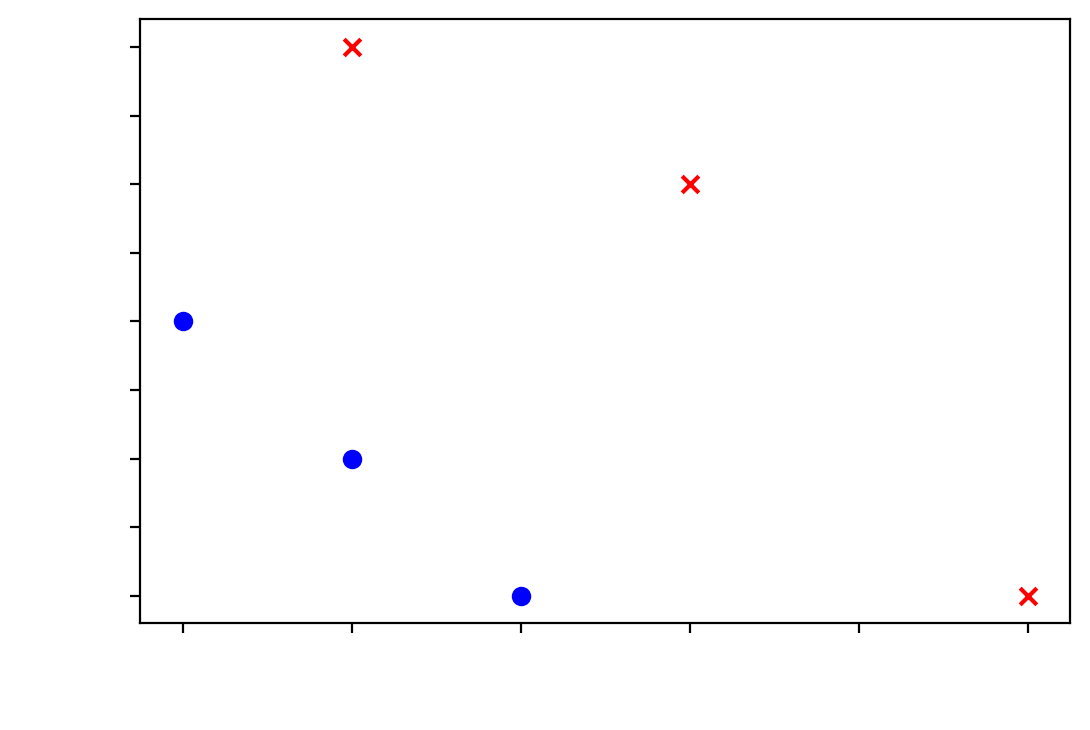

In [3]:
x1_train = X[:,0]
x2_train = X[:,1]
pos = (y == 1)
neg = (y == 0)

plt.figure(dpi = 200)

plt.scatter(x1_train[pos],x2_train[pos], label =  "Y = 1 " ,marker = "x", c ="r" )
plt.scatter(x1_train[neg],x2_train[neg], label = "Y = 0" ,marker = "o", c = "b")

plt.xlabel("X0", c = "w" )
plt.ylabel("X1", c = "w" )
plt.xticks(c = "w" )
plt.yticks( c = "w" )

plt.show()

In [4]:
def sigmoid_model (z):
    z = np.array(z)
    g_z = 1/(1+(np.exp(-z)))
    return g_z

In [5]:
def modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b) 
    return f_wb

In [6]:
def cost (x,y,w,b):
    m = x.shape[0]
    f_wb = modle(x,w,b)
    sumation = []
    for i in range (m):
        sumation.append((f_wb[i]-y[i])**2)
    return sum(sumation)/(2*m)

In [7]:
def gradent (x,y,w,b):
    n = x.shape[1]
    m = x.shape[0]
    dj_dw = []
    dj_db = []
    f_wb = modle(x,w,b)
    for j in range(n):
        cost = []
        for i in range(m):
            cost.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append(sum(cost)/m)
            
    for i in range(m):
        dj_db.append((f_wb[i]-y[i]))
    return dj_dw , sum(dj_db)/m

In [8]:
def gradent_descent(x,y,w,b,alpha,num_iters):
    n = x.shape[1]
    iter_num_i = np.array(np.arange(0,num_iters,1))
    cost_of_iter_num_i = []
    for i in range(num_iters):
        dj_dw ,dj_db = gradent(x,y,w,b)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        # calculating cost after each iteration 
        cost_of_iter_num_i.append(cost(x,y,w,b))
        if i%200 ==0:
            print ("iter {}: w = {} & b = {} ========>  Cost:  {}".format(i,w,b,cost(x,y,w,b)))
    print("optemal value for w = {} and b = {} ".format(w,b))
    return w, b , iter_num_i ,cost_of_iter_num_i

In [9]:
w, b ,_,_ = gradent_descent(X,y,w_init,b_init,0.1,5000)

iter 0: w = [-3.26666667  0.19166667] & b = 0.9333333333333335 ========>  Cost:  13.500219907407407
iter 200: w = [0.36107247 0.31555392] & b = -0.41373976509871496 ========>  Cost:  0.02595374612568455
iter 400: w = [0.52855154 0.50009504] & b = -0.9471310595568257 ========>  Cost:  0.006102526736325655
iter 600: w = [0.57158507 0.54751266] & b = -1.0841852911615286 ========>  Cost:  0.004791896315223719
iter 800: w = [0.58264249 0.55969656] & b = -1.119401206135887 ========>  Cost:  0.0047053650011001
iter 1000: w = [0.58548368 0.56282719] & b = -1.1284498918492771 ========>  Cost:  0.0046996519730767685
iter 1200: w = [0.58621372 0.56363161] & b = -1.130774940430277 ========>  Cost:  0.004699274783737565
iter 1400: w = [0.5864013 0.5638383] & b = -1.1313723587819842 ========>  Cost:  0.004699249880691927
iter 1600: w = [0.5864495  0.56389141] & b = -1.1315258646871391 ========>  Cost:  0.0046992482365264725
iter 1800: w = [0.58646188 0.56390506] & b = -1.1315653078392447 ========>  

In [10]:
# the best fitted line to the data
z = modle(X,w,b)
print(z)

[0.007518796992486143, 0.018796992481208363, 0.030075187969930584, 0.9097744360902238, 1.1691729323308218, 0.8646616541353354]


In [11]:
g_z = 100*sigmoid_model(z)
"""
as we can see from the results propapility of each training example to have y = 1 (maligmant)
show's that the modle predected that the last three examples have a higher propability of having y = 1
note: here we used Square error cost function but and it worked in this ex 
because it as only one local min which is the glouble min we will use another cost function 
but in general The non-linear nature of the sigmoide model results in a “wiggly”, 
non-convex cost function with many potential local minima.
""" 
for i in g_z:
    if i >= 70:
        print("{} % ==> maligmant".format(i))
    else:
        print("{} % ==> Not maligmant".format(i))

50.18796903928602 % ==> Not maligmant
50.469910976094944 % ==> Not maligmant
50.75182303038085 % ==> Not maligmant
71.29540031819515 % ==> maligmant
76.29954868230982 % ==> maligmant
70.3633686474293 % ==> maligmant


In [12]:
x_0 = np.arange(0,6,1)
x_1 = (-b -x_0*w[0]) /w[1]

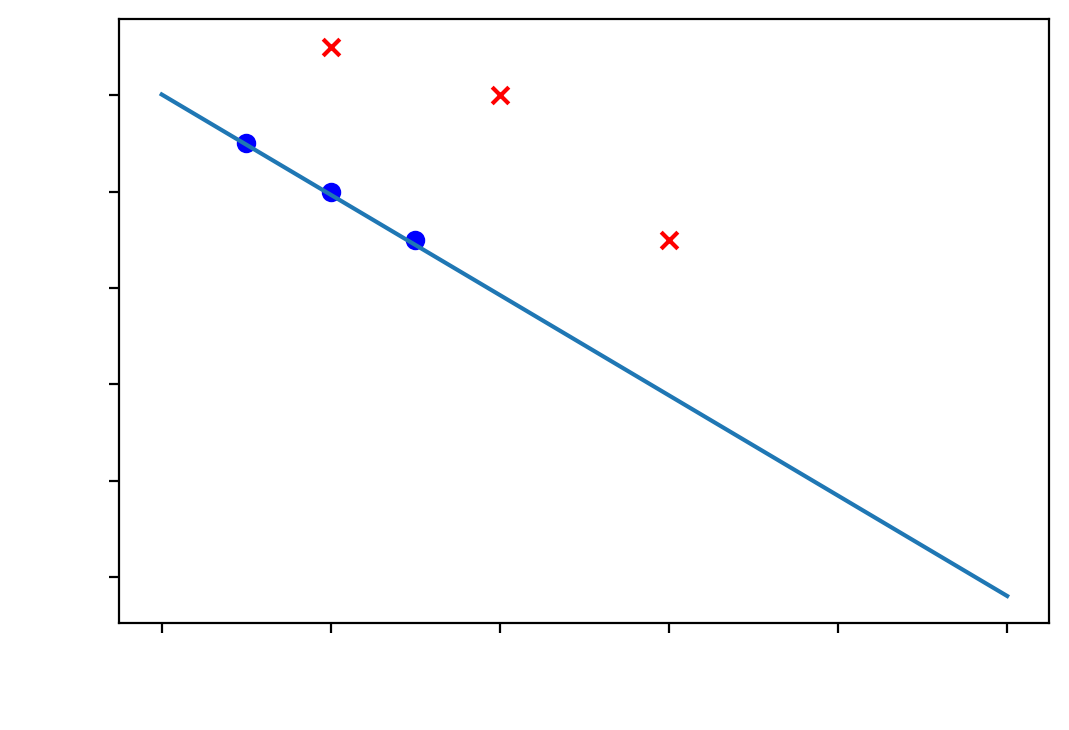

In [13]:
x1_train = X[:,0]
x2_train = X[:,1]
pos = (y == 1)
neg = (y == 0)

plt.figure(dpi = 200)

plt.scatter(x1_train[pos],x2_train[pos], label =  "Y = 1 " ,marker = "x", c ="r" )
plt.scatter(x1_train[neg],x2_train[neg], label = "Y = 0" ,marker = "o", c = "b")
plt.plot(x_0,x_1)
plt.xlabel("X0", c = "w" )
plt.ylabel("X1", c = "w" )
plt.xticks(c = "w" )
plt.yticks( c = "w" )

plt.show()